In [77]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [78]:
# read last pickle file in 'xGW-GAT_ppmi copy 2/outputs/results'
with open('xGW-GAT_ppmi copy 2/outputs/results/2024-02-28 08:06:43.342652_gcn_adj_binary.pkl', 'rb') as f:
    results = pkl.load(f)


In [79]:
mask_matrix = results['mask']
mask_matrix.shape

torch.Size([64, 64])

In [80]:
from nilearn import datasets
from nilearn.maskers import NiftiMapsMasker
from nilearn import plotting

dataset = datasets.fetch_atlas_difumo(
                dimension=mask_matrix.shape[1],
                resolution_mm=2
            )
atlas_maps = dataset.maps
labels = dataset.labels

/opt/anaconda3/envs/cns/lib/python3.11/site-packages/nilearn/datasets/atlas.py:142: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


/opt/anaconda3/envs/cns/lib/python3.11/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


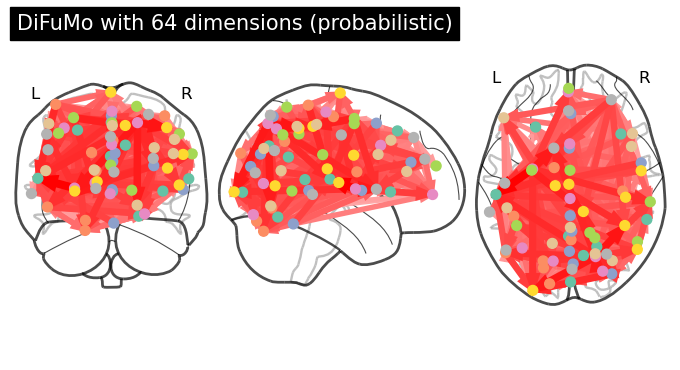

In [81]:
coordinates = plotting.find_probabilistic_atlas_cut_coords(
    maps_img=atlas_maps
)

# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(
    mask_matrix,
    coordinates,
    edge_threshold="80%",
    title=f"DiFuMo with {mask_matrix.shape[1]} dimensions (probabilistic)",
)
plotting.show()

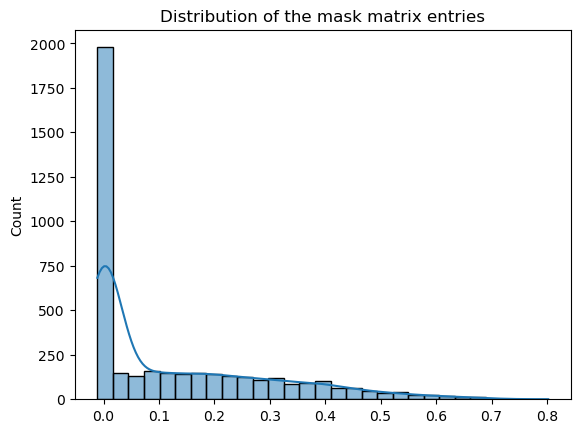

Total number of elements in the tensor:  4096


In [83]:
mask_matrix_numpy = mask_matrix.numpy()
mask_matrix_numpy = mask_matrix_numpy.reshape(-1)
sns.histplot(mask_matrix_numpy, kde=True)
plt.title("Distribution of the mask matrix entries")
plt.show()
print("Total number of elements in the tensor: ", mask_matrix_numpy.shape[0])

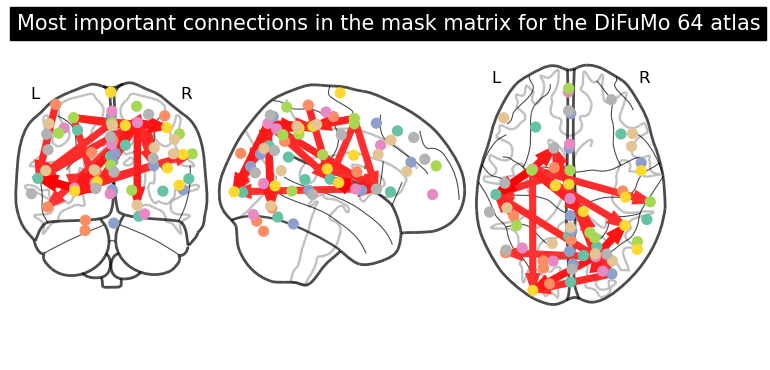

In [85]:
mask_matrix_numpy[mask_matrix_numpy < 0.1] = 0
mask_matrix_threshold = torch.tensor(mask_matrix_numpy).reshape(mask_matrix.shape)

plotting.plot_connectome(
    mask_matrix_threshold,
    coordinates,
    edge_threshold=0.65,
    title=f"Most important connections in the mask matrix for the DiFuMo 64 atlas",
)
plotting.show()

In [95]:
mask_matrix_threshold[:, 0].nonzero().shape[0]

11

In [97]:
labels_names = [label[1] for label in labels]
non_zero_elements = {labels_names[i]: mask_matrix_threshold[:, i].nonzero().shape[0] for i in range(len(labels_names))}
non_zero_elements = dict(sorted(non_zero_elements.items(), key=lambda item: item[1], reverse=True))
non_zero_elements

{'Planum temporale': 57,
 'Occipital pole': 55,
 'Caudate': 54,
 'Cerebellum Crus II': 48,
 'Supramarginal gyrus': 46,
 'Inferior occipital gyrus': 45,
 'Intraparietal sulcus RH': 45,
 'Fusiform gyrus posterior': 43,
 'Callosomarginal sulcus': 43,
 'Lingual gyrus': 42,
 'Thalamus': 40,
 'Angular gyrus inferior': 40,
 'Precuneus superior': 39,
 'Central sulcus': 39,
 'Cingulate gyrus mid-anterior': 38,
 'Superior rostral gyrus': 38,
 'Superior occipital sulcus': 37,
 'Superior temporal sulcus with angular gyrus': 34,
 'Middle frontal gyrus anterior': 33,
 'Precentral gyrus superior': 32,
 'Inferior frontal gyrus': 32,
 'Lingual gyrus anterior': 30,
 'Intraparietal sulcus LH': 30,
 'Anterior Cingulate Cortex': 29,
 'Superior parietal lobule posterior': 29,
 'Precuneus anterior': 29,
 'Parieto-occipital sulcus superior': 27,
 'Descending occipital gyrus': 26,
 'Lateral occipital cortex': 25,
 'Superior frontal gyrus': 25,
 'Transverse sinus': 24,
 'Parieto-occipital sulcus middle': 24,
 '

In [100]:
# Top 5 regions labels with the most non-zero elements with nice printing 
print("Top 10 regions labels with the most non-zero elements:")
for i, (label, count) in enumerate(non_zero_elements.items()):
    print(f"{i+1}. {label}: {count} non-zero elements")

Top 10 regions labels with the most non-zero elements:
1. Planum temporale: 57 non-zero elements
2. Occipital pole: 55 non-zero elements
3. Caudate: 54 non-zero elements
4. Cerebellum Crus II: 48 non-zero elements
5. Supramarginal gyrus: 46 non-zero elements
6. Inferior occipital gyrus: 45 non-zero elements
7. Intraparietal sulcus RH: 45 non-zero elements
8. Fusiform gyrus posterior: 43 non-zero elements
9. Callosomarginal sulcus: 43 non-zero elements
10. Lingual gyrus: 42 non-zero elements
11. Thalamus: 40 non-zero elements
12. Angular gyrus inferior: 40 non-zero elements
13. Precuneus superior: 39 non-zero elements
14. Central sulcus: 39 non-zero elements
15. Cingulate gyrus mid-anterior: 38 non-zero elements
16. Superior rostral gyrus: 38 non-zero elements
17. Superior occipital sulcus: 37 non-zero elements
18. Superior temporal sulcus with angular gyrus: 34 non-zero elements
19. Middle frontal gyrus anterior: 33 non-zero elements
20. Precentral gyrus superior: 32 non-zero elements


In [113]:
# Create table with results from training different models
results = {"Baseline mask": {
    "Atlas": "DiFuMo 64",
    "Accuracy": 0.78,
    "Atlas": "DiFuMo 1024",
    "Accuracy": 0.81,
},
    "Masked AutoEncoder" : 
    {
        "Atlas": "DiFuMo 64",
        "Accuracy": 0.81,
        "Atlas": "DiFuMo 1024",
        "Accuracy": 0.84,
    }
}
results_df = pd.DataFrame(results).T
results_df

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [114]:
data = {
    "Model": ["Baseline mask", "Baseline mask", "Masked AutoEncoder", "Masked AutoEncoder"],
    "Atlas": ["DiFuMo 64", "DiFuMo 1024", "DiFuMo 64", "DiFuMo 1024"],
    "Accuracy": [0.78, 0.81, 0.81, 0.84]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

,Model,Atlas,Accuracy
0,Baseline mask,DiFuMo 64,0.78
1,Baseline mask,DiFuMo 1024,0.81
2,Masked AutoEncoder,DiFuMo 64,0.81
3,Masked AutoEncoder,DiFuMo 1024,0.84


In [ ]:
data = {
    "Model": ["Baseline mask", "Baseline mask", "Masked AutoEncoder", "Masked AutoEncoder"],
    "Atlas": ["DiFuMo 64", "DiFuMo 1024", "DiFuMo 64", "DiFuMo 1024"],
    "Accuracy": [0.78, 0.81, 0.81, 0.84]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

### DIFUMO 64 AND GCN###

# USM NON-SPARSE

INFO:root:(K Fold Final Result)| avg_acc=81.47 +- 0.72, avg_auc=61.62 +- 4.03, max_acc=82.35, max_auc=66.67

====================================
Testing for Treatment group:
Test acc: 0.7341549295774648, Test auc: 0.488391376451078
====================================
Testing for Scanner group:
Test acc: 0.9555555555555556, Test auc: 0.8875

# PITT NON-SPARSE

NFO:root:(K Fold Final Result)| avg_acc=83.16 +- 2.55, avg_auc=58.10 +- 4.74, max_acc=86.84, max_auc=64.10

====================================
Testing for Treatment group:
Test acc: 0.7869718309859155, Test auc: 0.5084210979733368
====================================
Testing for Scanner group:
Test acc: 0.9464285714285714, Test auc: 0.8144654088050314

# USM BASELINE_MASK L1


# PITT BASELINE_MASK L1


# USM BASELINE_MASK L2

INFO:root:(K Fold Final Result)| avg_acc=80.59 +- 2.85, avg_auc=62.10 +- 3.10, max_acc=85.29, max_auc=65.08

====================================
Testing for Treatment group:
Test acc: 0.727112676056338, Test auc: 0.4920957980659473
====================================
Testing for Scanner group:
Test acc: 0.9222222222222223, Test auc: 0.825

# PITT BASELINE_MASK L2

INFO:root:(K Fold Final Result)| avg_acc=82.89 +- 3.00, avg_auc=57.00 +- 4.30, max_acc=88.16, max_auc=63.60

====================================
Testing for Treatment group:
Test acc: 0.6690140845070423, Test auc: 0.5724623635071395
====================================
Testing for Scanner group:
Test acc: 0.9464285714285714, Test auc: 0.9716981132075472

# USM MAE MASK

INFO:root:(K Fold Final Result)| avg_acc=83.82 +- 1.61, avg_auc=62.14 +- 7.23, max_acc=86.76, max_auc=73.65

====================================
Testing for Treatment group:
Test acc: 0.7746478873239436, Test auc: 0.5089272253451358
====================================
Testing for Scanner group:
Test acc: 0.9333333333333333, Test auc: 0.83125


# PITT MAE MASK

INFO:root:(K Fold Final Result)| avg_acc=85.00 +- 4.04, avg_auc=59.05 +- 4.99, max_acc=89.47, max_auc=63.60

====================================
Testing for Treatment group:
Test acc: 0.7394366197183099, Test auc: 0.523464926450001
====================================
Testing for Scanner group:
Test acc: 0.9107142857142857, Test auc: 0.9528301886792453

Switch to GAT
VAE + AE without masking
turn on or off entire parcel --> pooling (maximum pooling or apply row mask)
zero out the parcels with threshold (hyperparameter)
lasso penalty for sparsification test how performs

Results: calculate how many parcels are sparsified!
accuracy (balanced)
AUC
percentage pf sparse correlations
percentage of sparse parcels
how similar are the matrices accross the fold

Evaluate: 
- 5 fold, leave one site out or multiple ones out otherwise also fine to do as before
OR
-  5 fold, CONTROLS vs ASD

Tuning hyperparameters: 
Validation set (in distribution) 

OOD testing: decide ASD or sites
